In [1]:
# import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
# Variables
batch_size = 100
input_scale = 30
bins = 200
iteration = 100000
i = 0
cost_graph=[]
iteration_graph=[]
'''이번 모델을 생각하게 된 개기는 이 프로그램이 예측한 답이 정말 답인가에 대한 신뢰성을 좀 더
높혀주기 위해서 이다.
만약에 왼쪽으로 치우쳐진 포텐셜 벽이 있다면 파동함수는 오른쪽에 형성되어야 한다.
반대로 오른쪽으로 치우쳐진 포텐셜은 왼쪽으로 형성되어야 한다.
전자가 먼저 학습된 후, 후자로 바뀌어도 로컬 미니멈에 빠지지 않고 올바른 정답을 찾아낼 수 있음을 입증한다.'''

In [3]:
# input random number
input = tf.random_normal([batch_size,input_scale])

In [4]:
# Basic infinite ptential input
# potential = tf.constant(1.0, shape = [batch_size,bins])

In [5]:
# Left bounding potential
'''왼쪽으로 치우쳐진 포텐셜 장벽'''
k = int(bins/2)
infinite = tf.constant(1.0e8, shape = [batch_size,1])
Lpotential1 = tf.constant(0., shape = [batch_size,bins])
Lpotential2 = tf.concat([Lpotential1[:,:k-30],infinite] ,-1)
Lpotential = tf.concat([Lpotential2,Lpotential1[:,k-29:]] ,-1)

In [6]:
'''포텐셜을 플레이스홀더로 잡고 나중에 자유롭게 바꿀 수 있게 설정'''
potential = tf.placeholder(tf.float32, (batch_size, bins))

In [7]:
# Right bounding potential
'''오른쪽으로 치우쳐진 포텐셜 장벽'''
k = int(bins/2)
infinite = tf.constant(1.0e8, shape = [batch_size,1])
Rpotential1 = tf.constant(0., shape = [batch_size,bins])
Rpotential2 = tf.concat([Rpotential1[:,:k+30],infinite] ,-1)
Rpotential = tf.concat([Rpotential2,Rpotential1[:,k+31:]] ,-1)

In [8]:
## 포텐셜 모양 보기 용
# sess= tf.Session()
# a = sess.run(Rpotential)
# print(a)
# print(Rpotential)
# plt.plot(a[0]/max(a[0]))
# plt.show()

In [9]:
# Weight, Bias
weight = tf.Variable(tf.random_normal([input_scale, bins]), dtype = tf.float32)
bias = tf.Variable(tf.random_normal([batch_size, bins]), dtype = tf.float32)


In [10]:
# Psi
psi = tf.matmul(input, weight) + bias
psi = tf.divide(psi,tf.sqrt(tf.reduce_mean(tf.square(psi))))

zeroten = tf.zeros([batch_size,1], tf.float32)
psil = tf.concat([psi[:,1:],zeroten],1)
psir = tf.concat([zeroten,psi[:,:-1]],1)

In [11]:
# Energy and Cost
energy = tf.reduce_mean(tf.subtract(tf.multiply(tf.square(psi),tf.add(potential,1.*bins*bins)),tf.multiply(tf.multiply(tf.add(psil,psir),psi),0.5*bins*bins)), axis=-1)
cost = tf.reduce_mean(energy)

In [12]:
# Optimizer
train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

In [13]:
# If you want to use CPU
config = tf.ConfigProto(device_count = {'GPU': 0})

sess = tf.Session(config=config)

# If you want to use GPU
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True

# sess = tf.Session(config=config)

In [14]:
init = tf.global_variables_initializer()
# sess = tf.Session()
sess.run(init)
# _ = sess.run(renorm)

iteration=0, cost=655483.062500


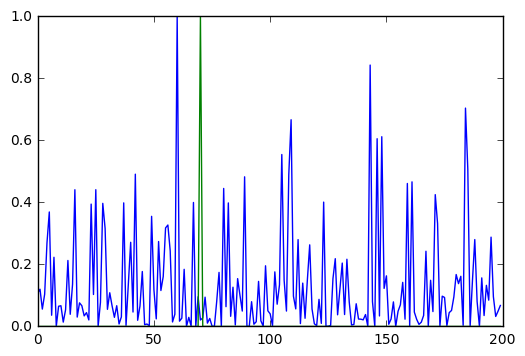

iteration=1000, cost=8177.884766


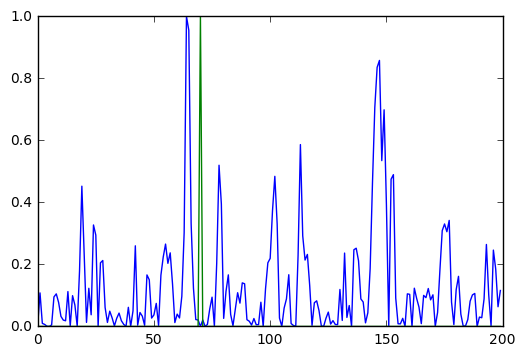

iteration=2000, cost=2619.720703


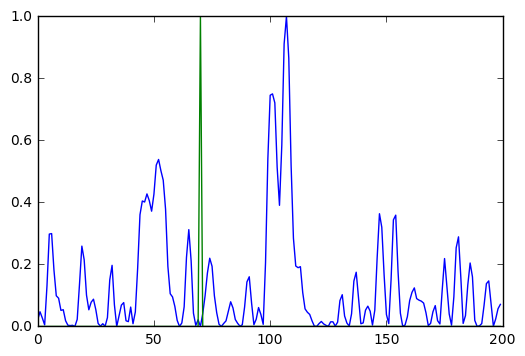

iteration=3000, cost=1223.864258


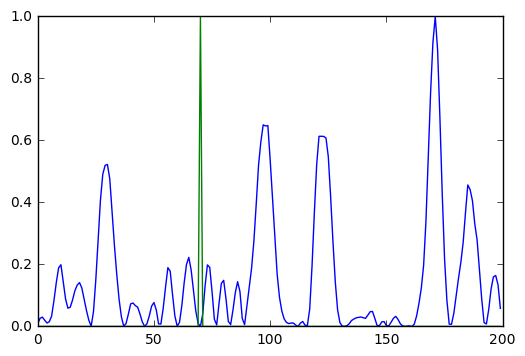

iteration=4000, cost=688.223206


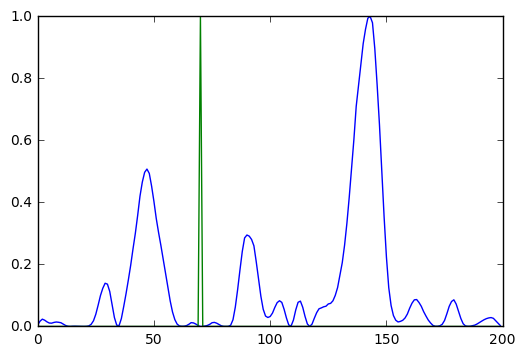

iteration=5000, cost=422.591339


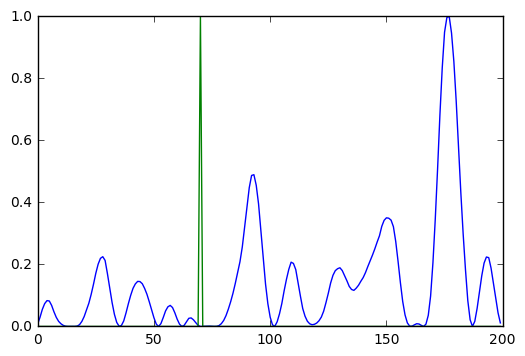

iteration=6000, cost=236.153809


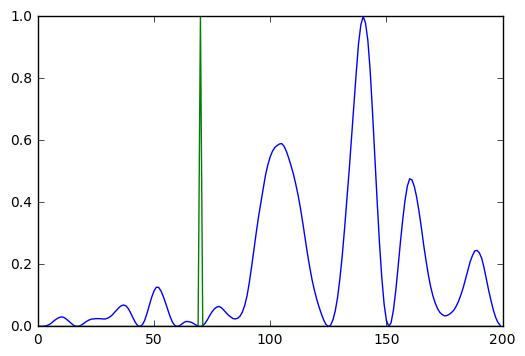

iteration=7000, cost=133.763687


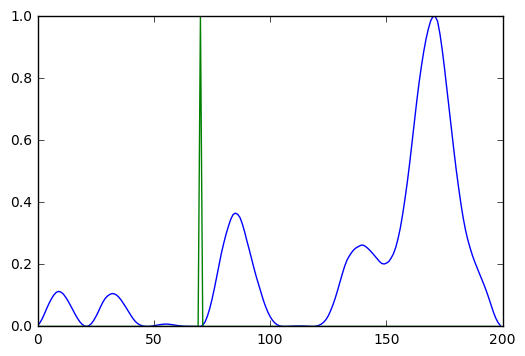

iteration=8000, cost=88.014229


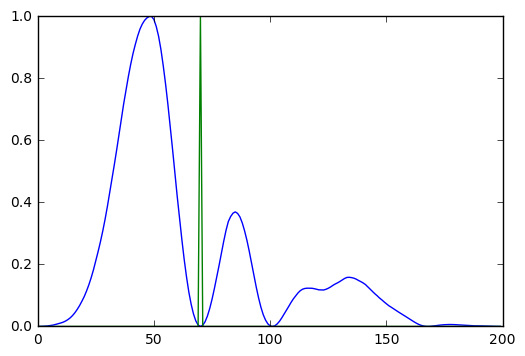

iteration=9000, cost=48.653622


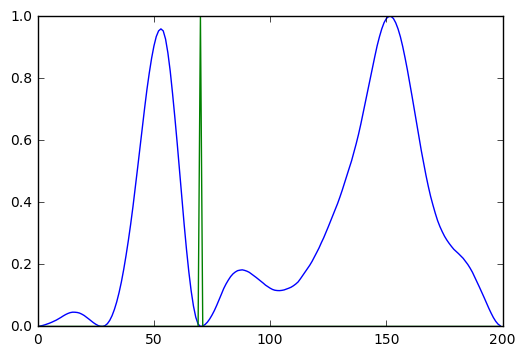

iteration=10000, cost=32.256813


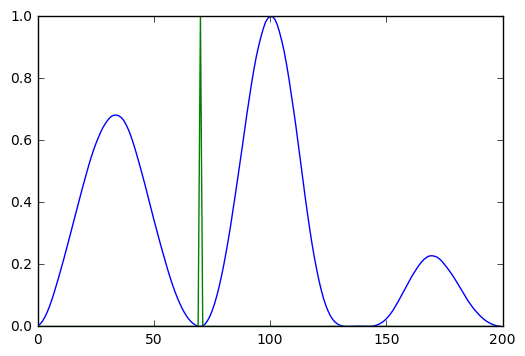

iteration=11000, cost=24.551723


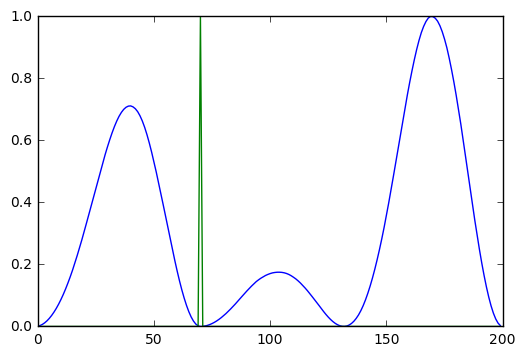

iteration=12000, cost=18.278131


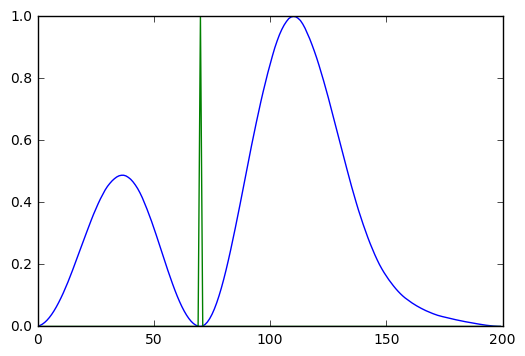

iteration=13000, cost=15.195051


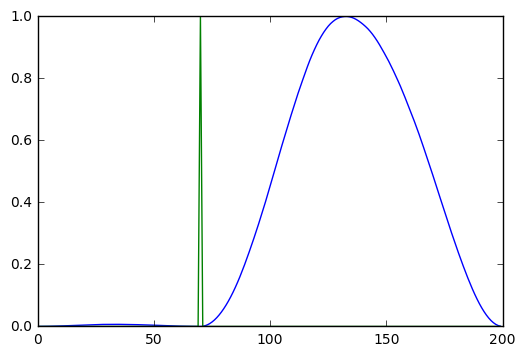

iteration=14000, cost=12.125099


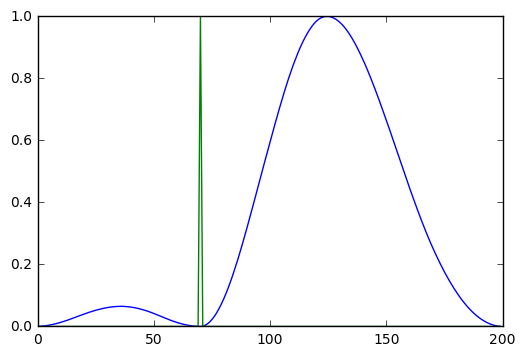

iteration=15000, cost=11.798780


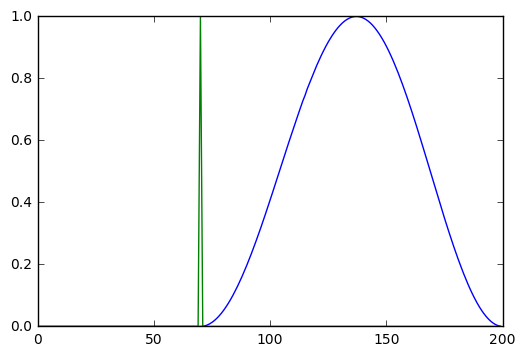

iteration=16000, cost=11.755657


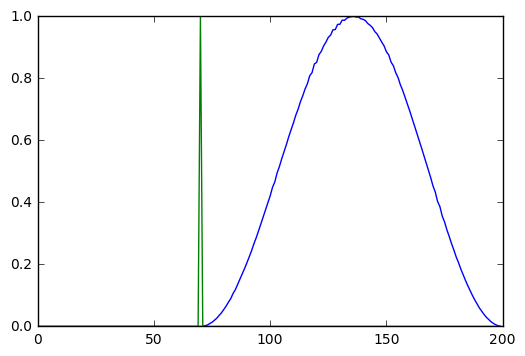

iteration=17000, cost=11.762311


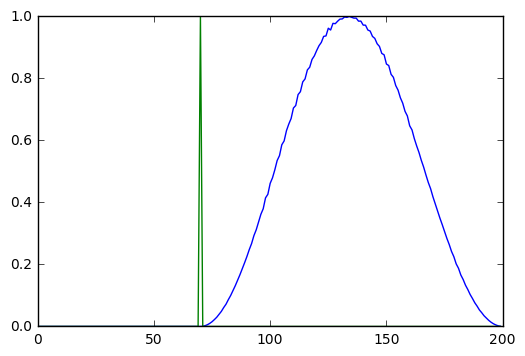

iteration=18000, cost=11.737936


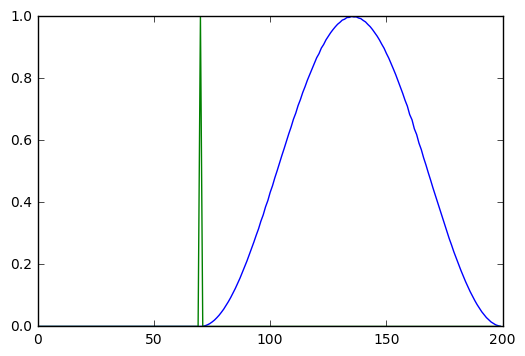

iteration=19000, cost=11.872323


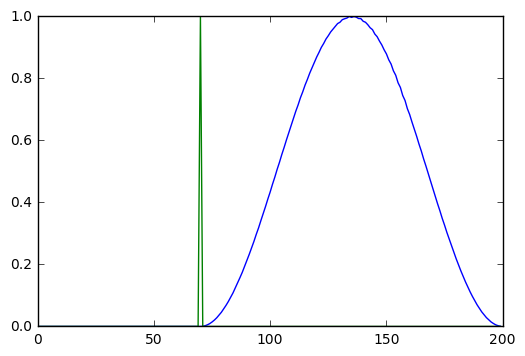

iteration=20000, cost=11.902536


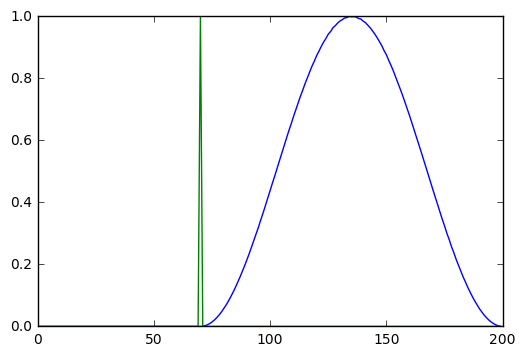

iteration=21000, cost=12.742628


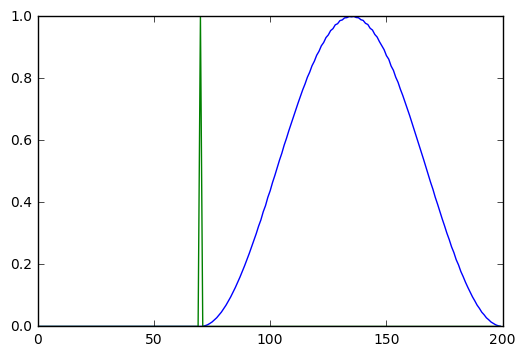

iteration=22000, cost=11.775196


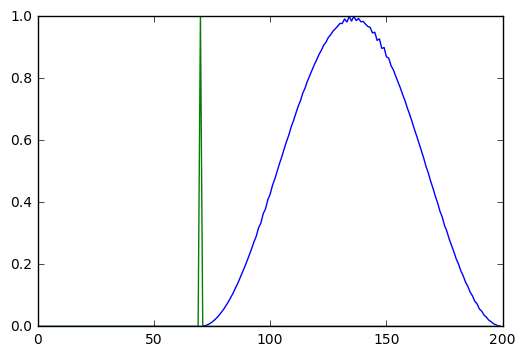

iteration=23000, cost=11.764137


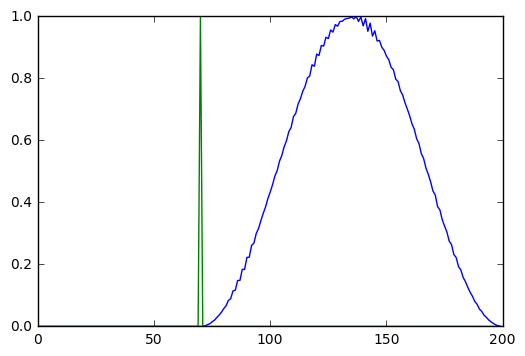

iteration=24000, cost=11.798062


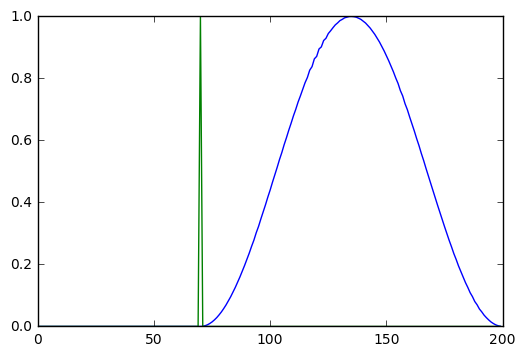

iteration=25000, cost=11.750422


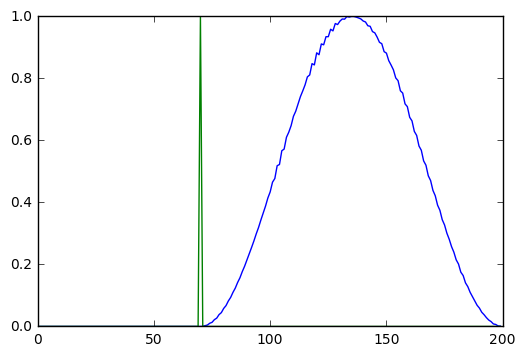

iteration=26000, cost=11.913189


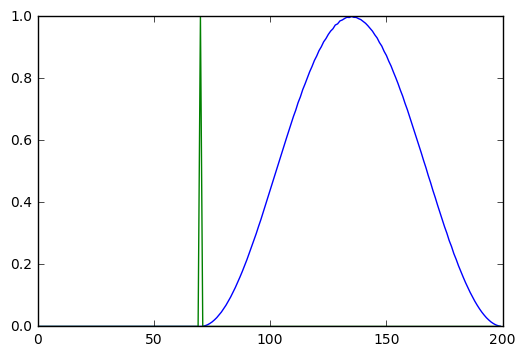

iteration=27000, cost=11.767931


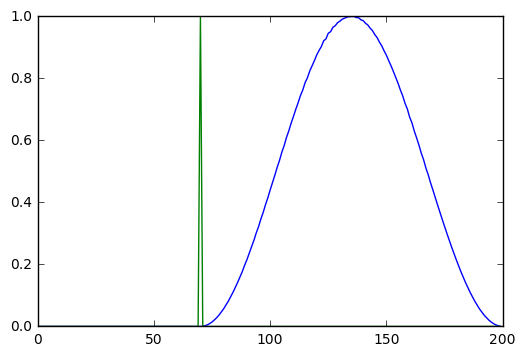

iteration=28000, cost=11.859344


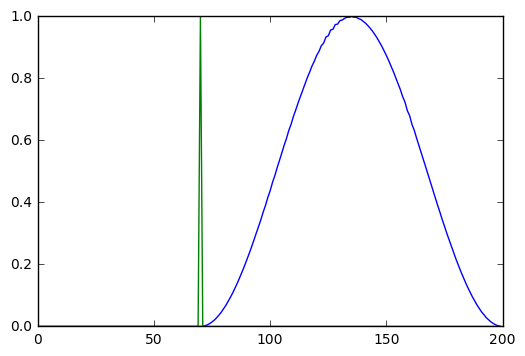

iteration=29000, cost=11.841326


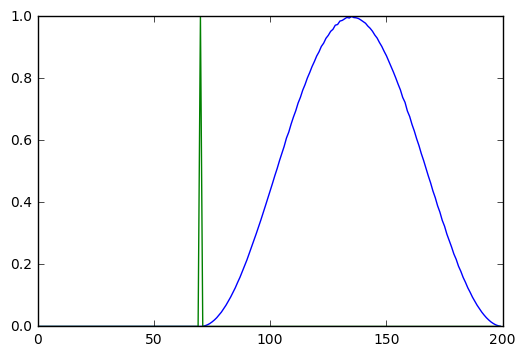

iteration=30000, cost=11.881884


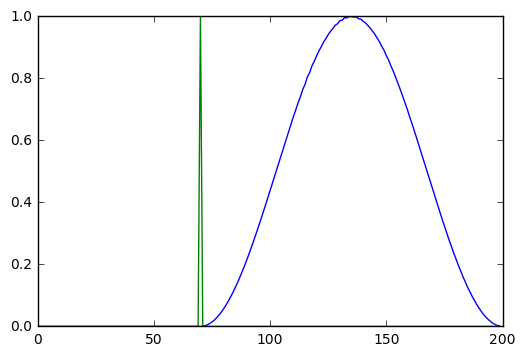

iteration=31000, cost=11.758018


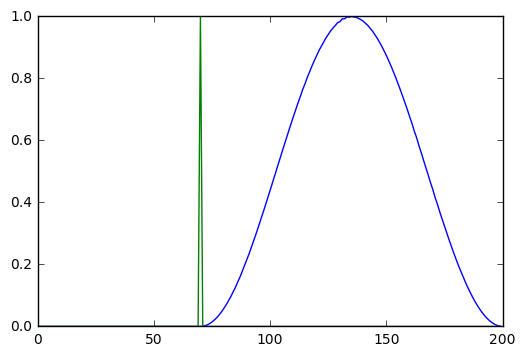

iteration=32000, cost=11.698700


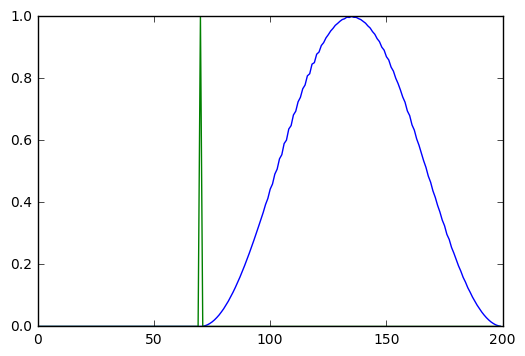

iteration=33000, cost=11.723593


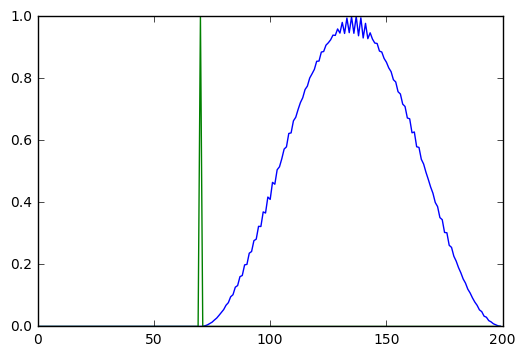

iteration=34000, cost=12.523007


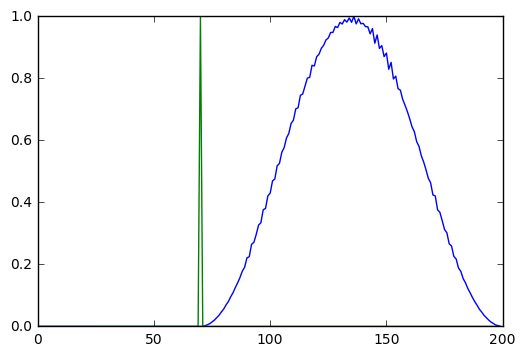

iteration=35000, cost=12.450390


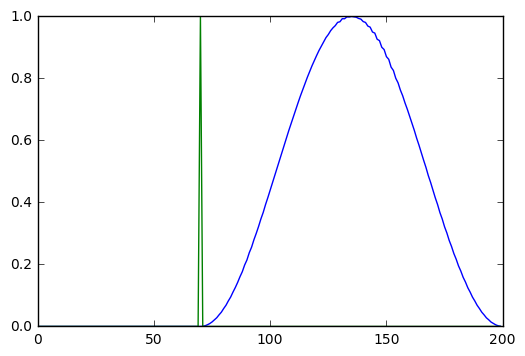

iteration=36000, cost=12.444431


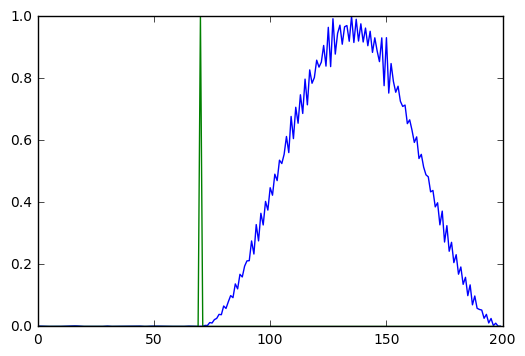

iteration=37000, cost=13.043618


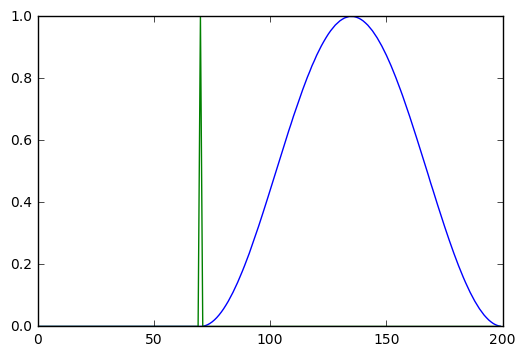

iteration=38000, cost=12.106781


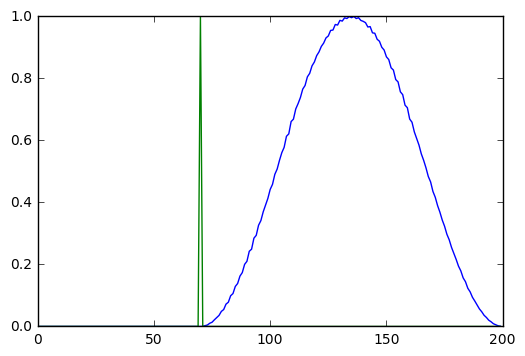

iteration=39000, cost=11.880611


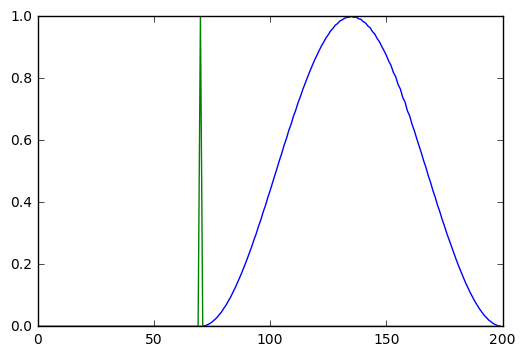

iteration=40000, cost=12.147300


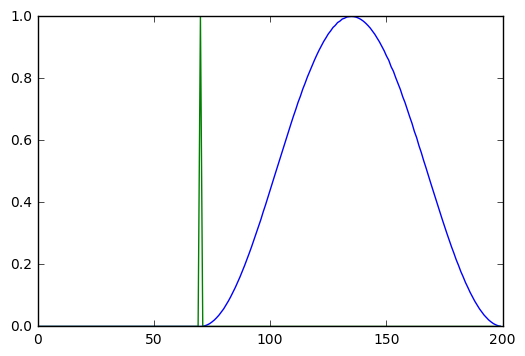

iteration=41000, cost=12.212109


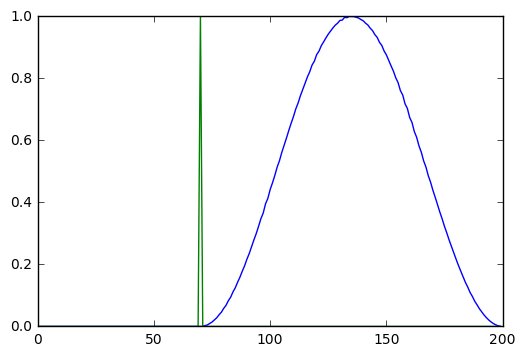

iteration=42000, cost=11.986681


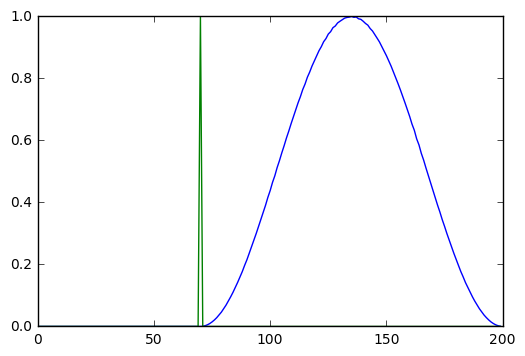

iteration=43000, cost=11.936817


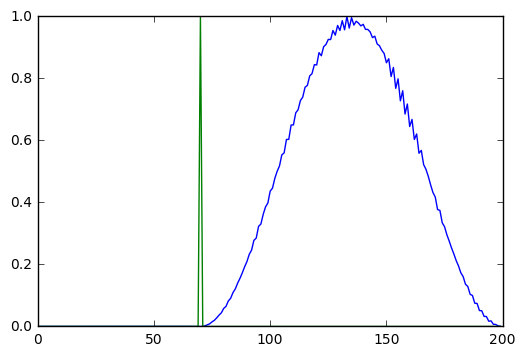

iteration=44000, cost=11.919794


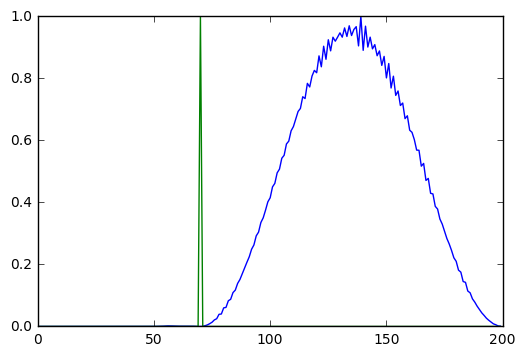

iteration=45000, cost=12.105412


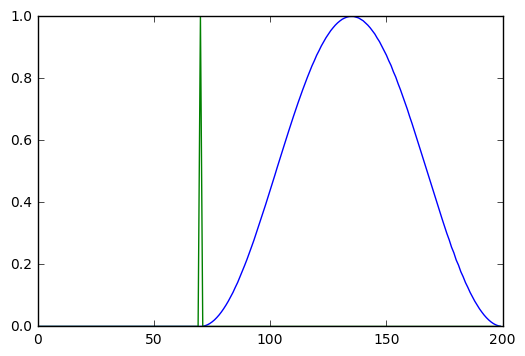

iteration=46000, cost=11.933311


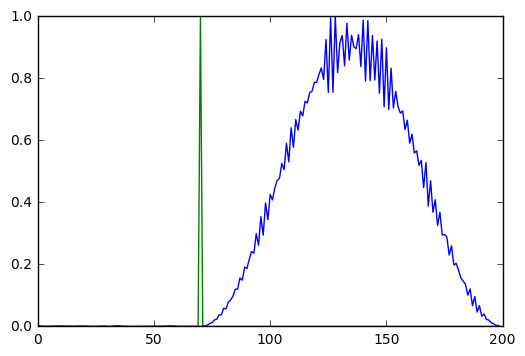

iteration=47000, cost=11.789545


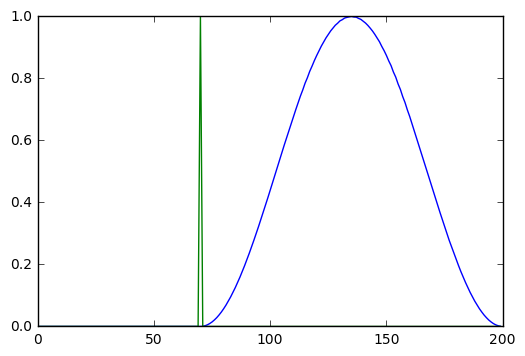

iteration=48000, cost=12.023582


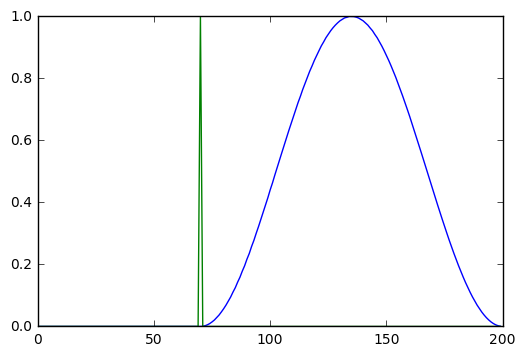

iteration=49000, cost=11.764850


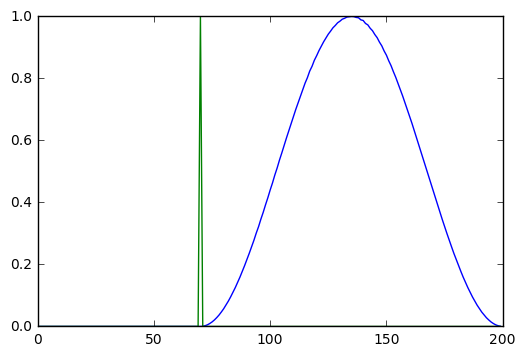

iteration=50000, cost=1516114.500000


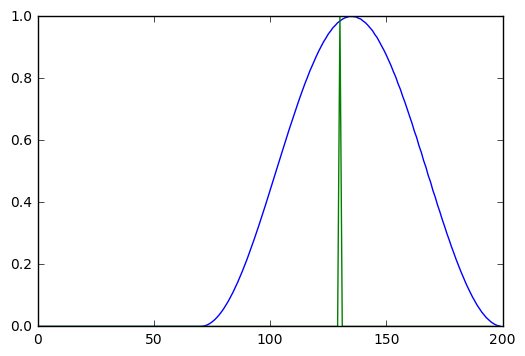

iteration=51000, cost=24684.488281


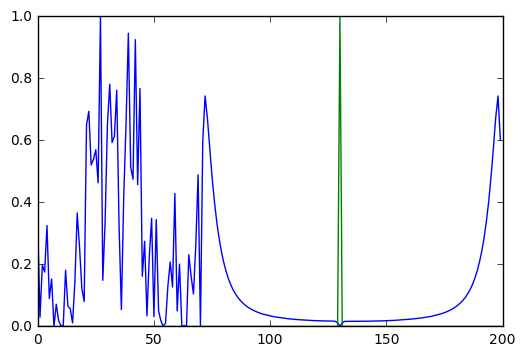

iteration=52000, cost=1910.212402


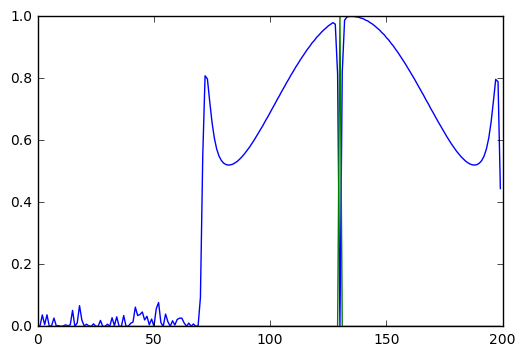

iteration=53000, cost=566.368958


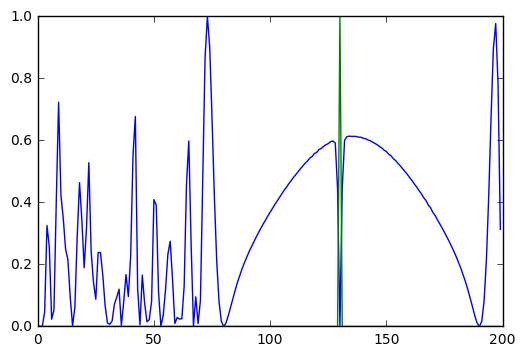

iteration=54000, cost=366.644562


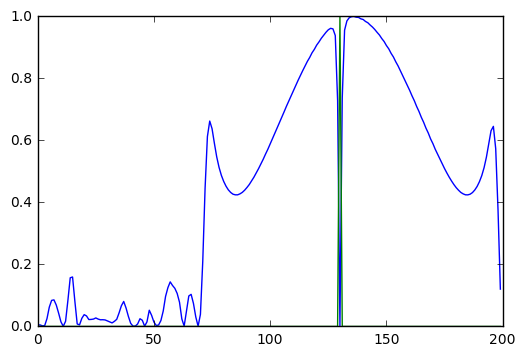

iteration=55000, cost=278.566986


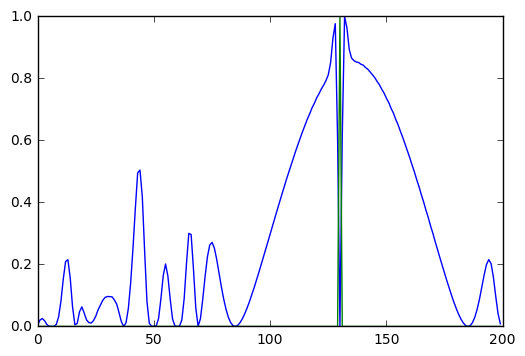

iteration=56000, cost=205.677475


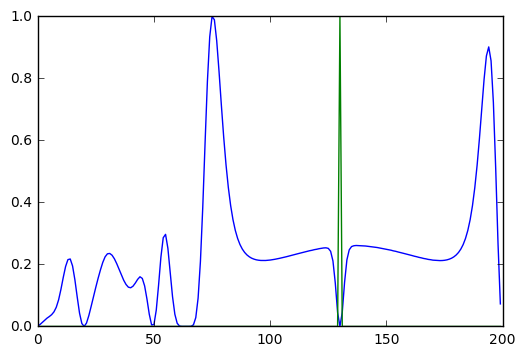

iteration=57000, cost=164.488815


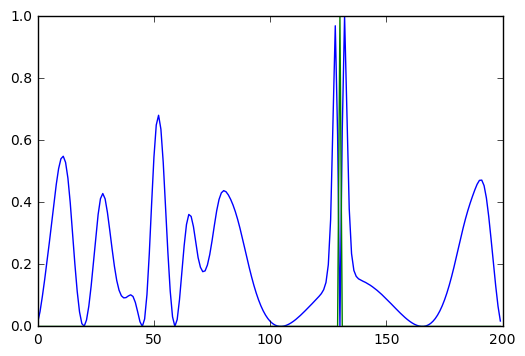

iteration=58000, cost=128.463684


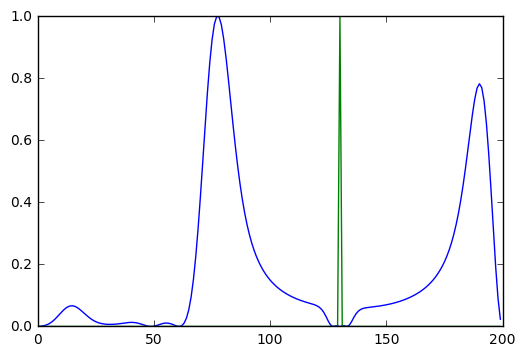

iteration=59000, cost=99.252289


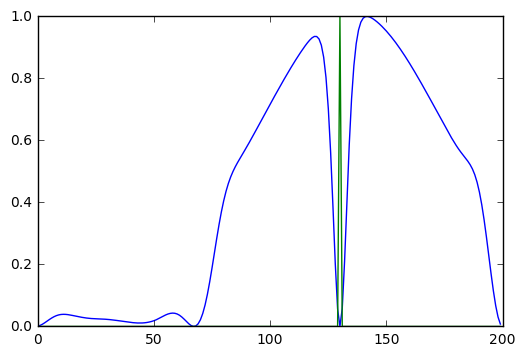

iteration=60000, cost=78.820732


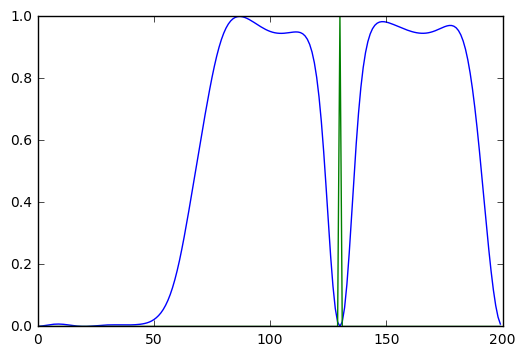

iteration=61000, cost=63.571487


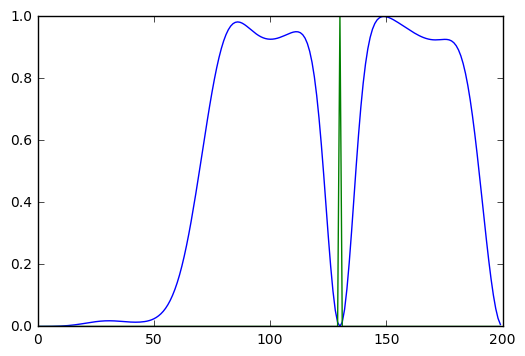

iteration=62000, cost=51.240829


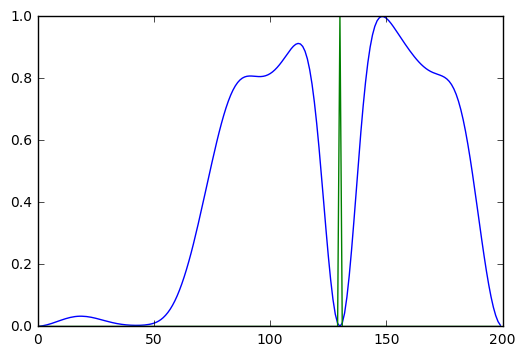

iteration=63000, cost=42.870132


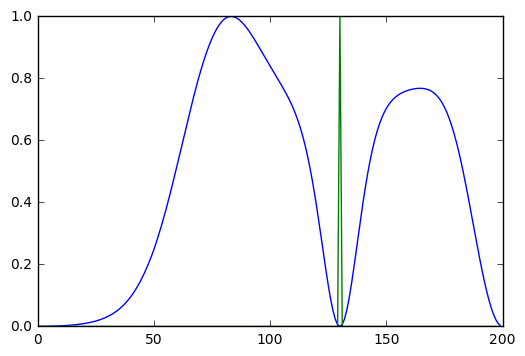

iteration=64000, cost=33.436420


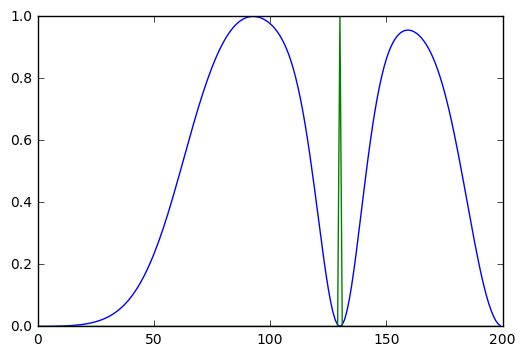

iteration=65000, cost=26.840418


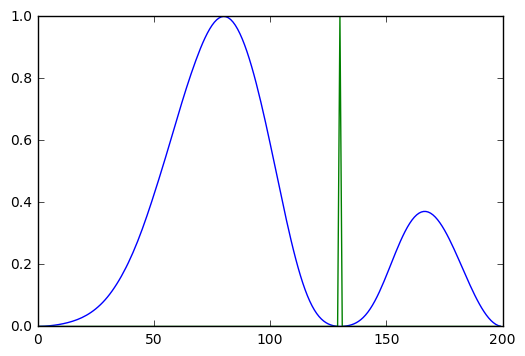

iteration=66000, cost=21.677841


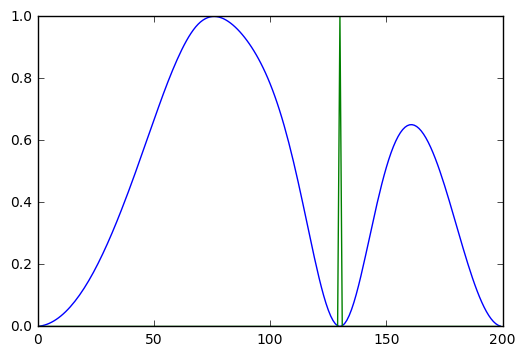

iteration=67000, cost=18.201530


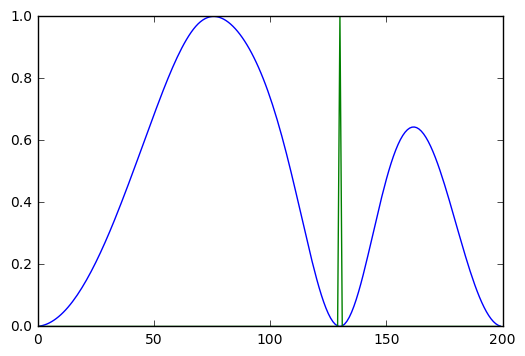

iteration=68000, cost=15.274616


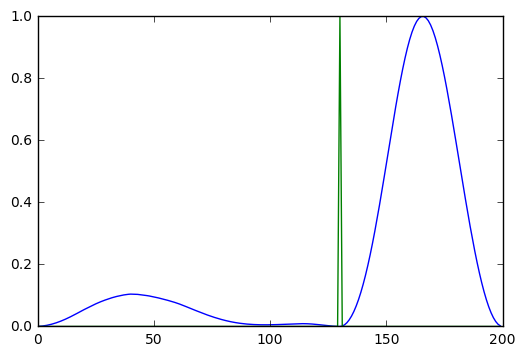

iteration=69000, cost=13.722315


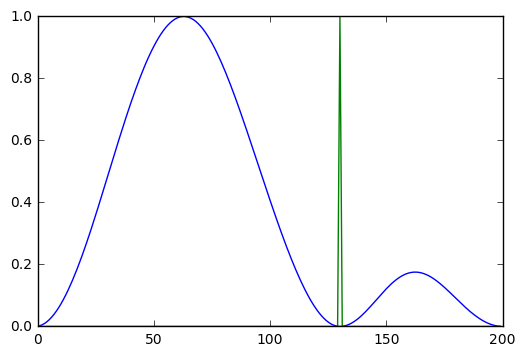

iteration=70000, cost=12.613905


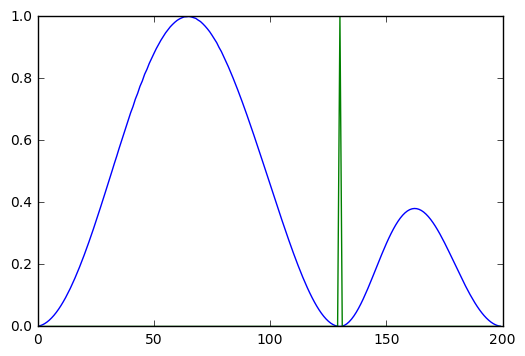

iteration=71000, cost=11.866982


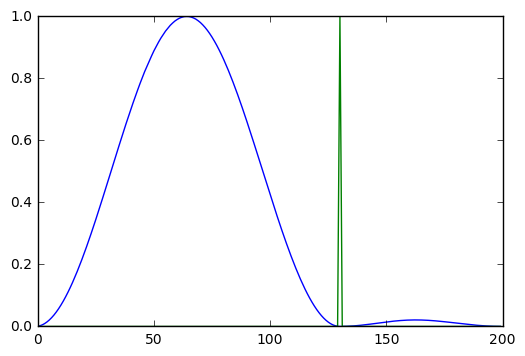

iteration=72000, cost=11.598525


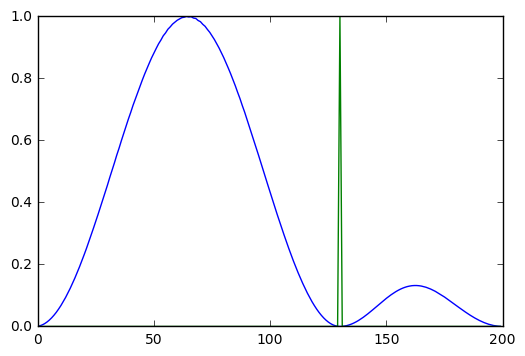

iteration=73000, cost=11.551377


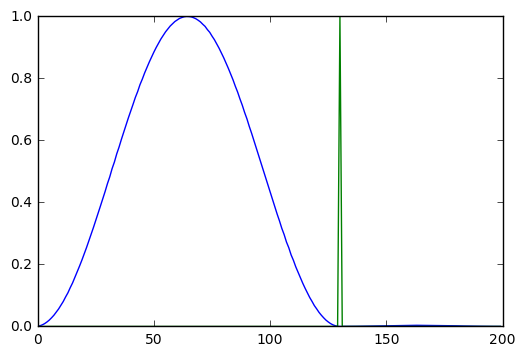

iteration=74000, cost=11.564149


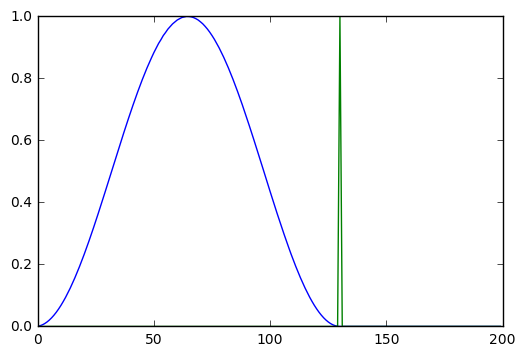

iteration=75000, cost=11.581518


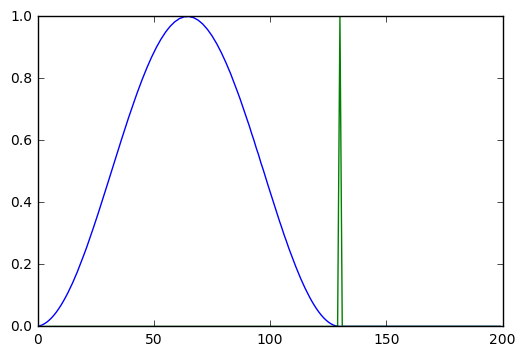

iteration=76000, cost=11.516409


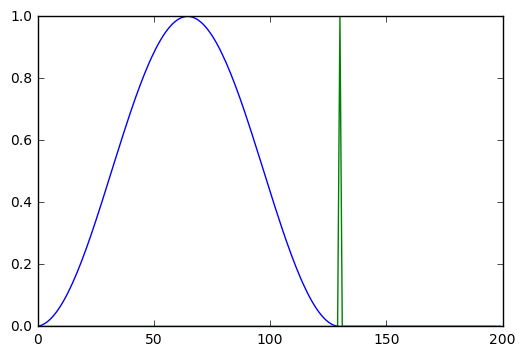

iteration=77000, cost=11.528919


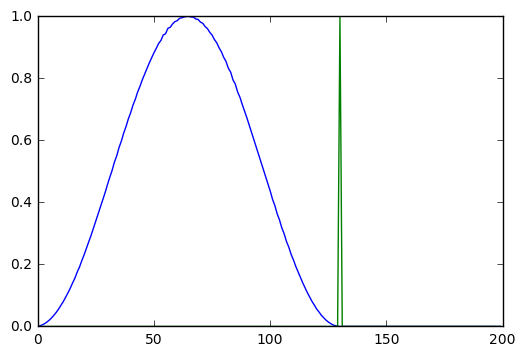

iteration=78000, cost=11.503955


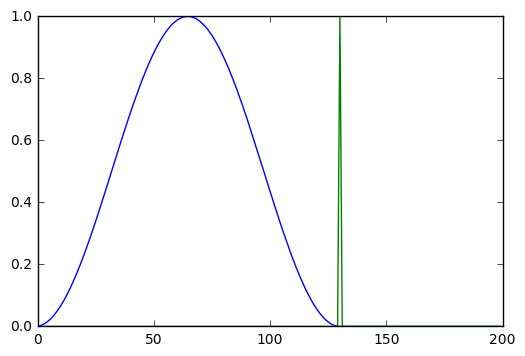

iteration=79000, cost=11.505474


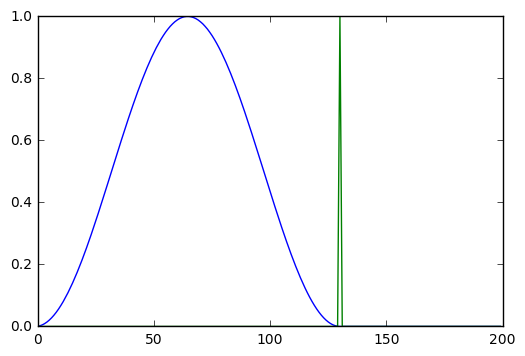

iteration=80000, cost=11.509458


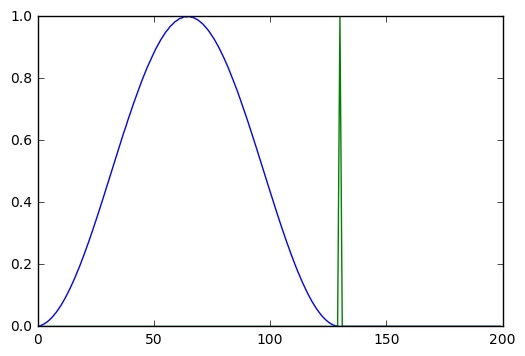

iteration=81000, cost=11.512712


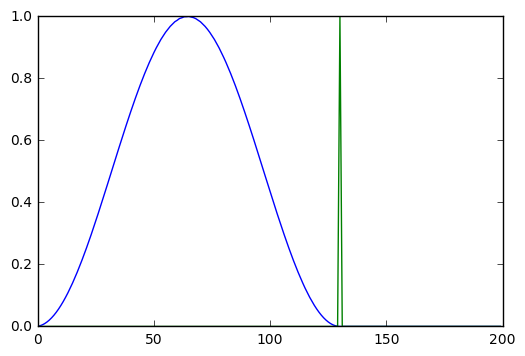

iteration=82000, cost=11.564289


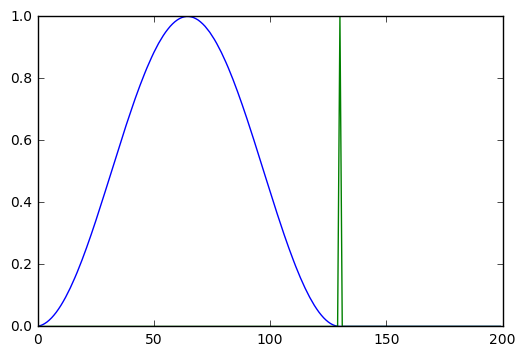

iteration=83000, cost=11.573875


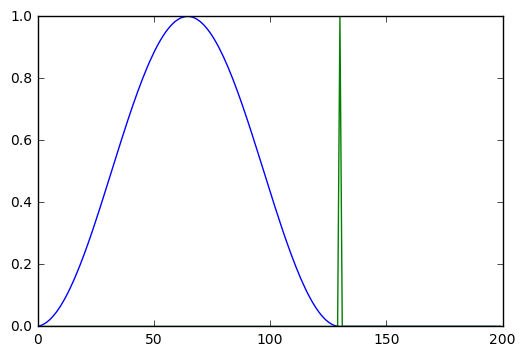

iteration=84000, cost=11.515359


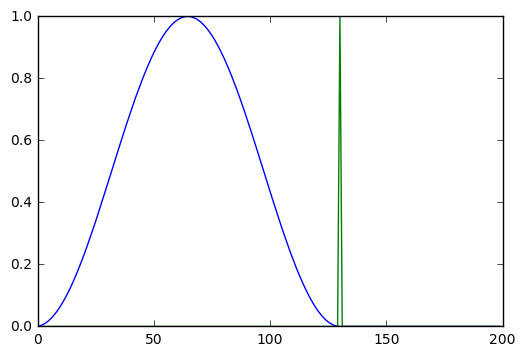

iteration=85000, cost=11.528720


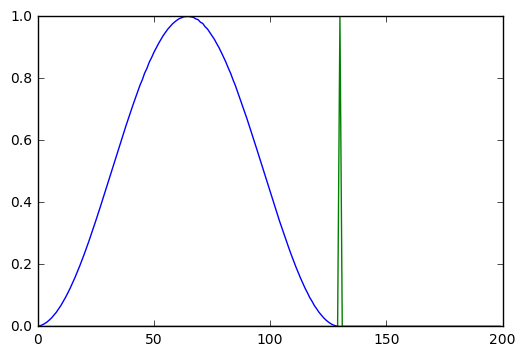

iteration=86000, cost=11.617903


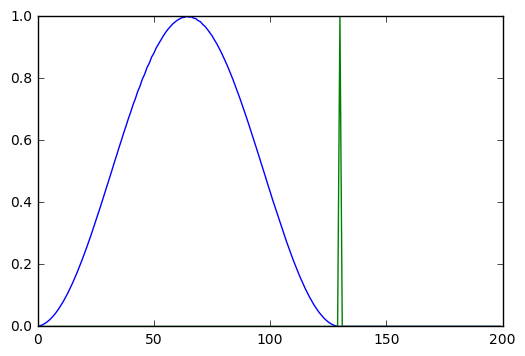

iteration=87000, cost=11.538692


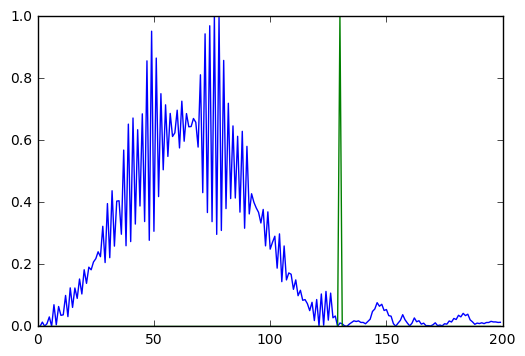

iteration=88000, cost=11.537561


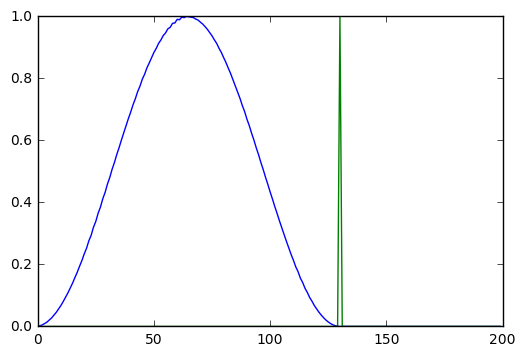

iteration=89000, cost=11.524985


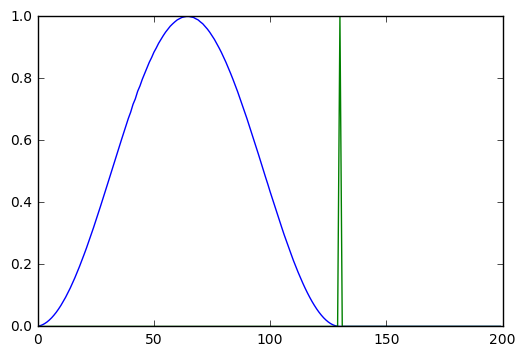

iteration=90000, cost=11.504882


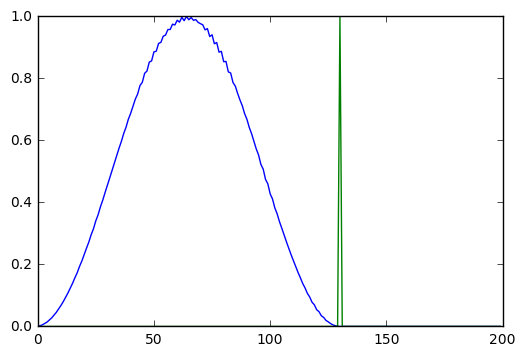

iteration=91000, cost=11.504948


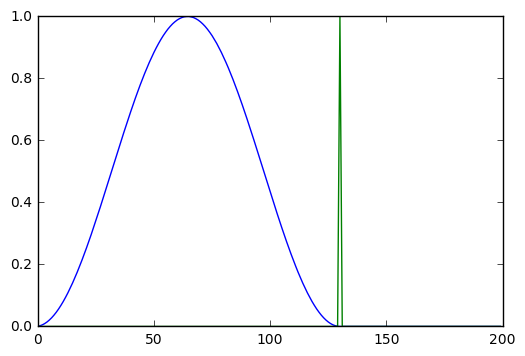

iteration=92000, cost=11.504668


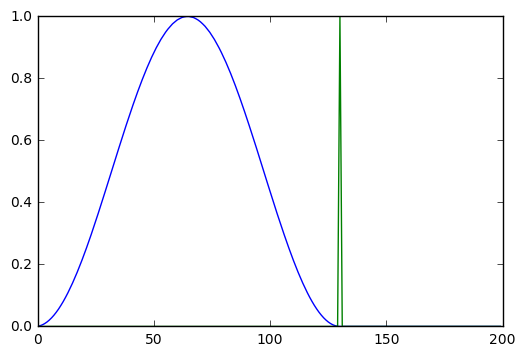

iteration=93000, cost=11.509294


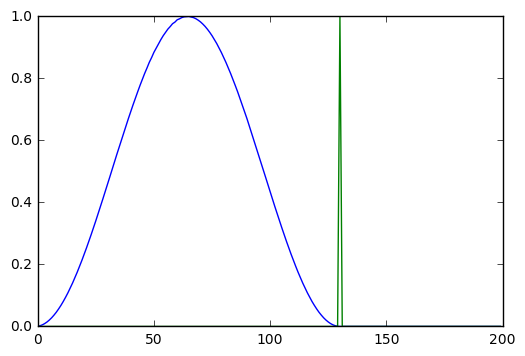

iteration=94000, cost=11.600498


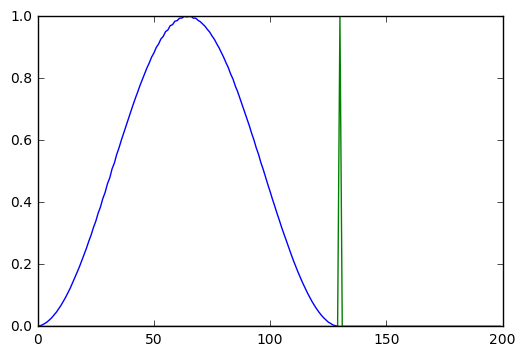

iteration=95000, cost=11.509889


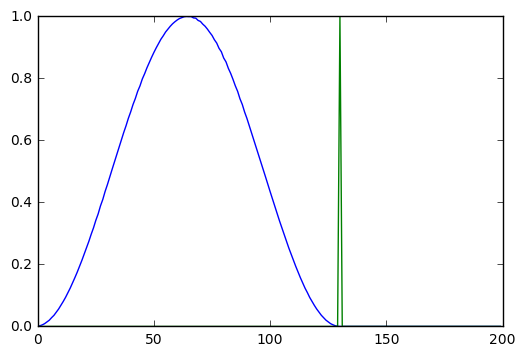

iteration=96000, cost=11.562848


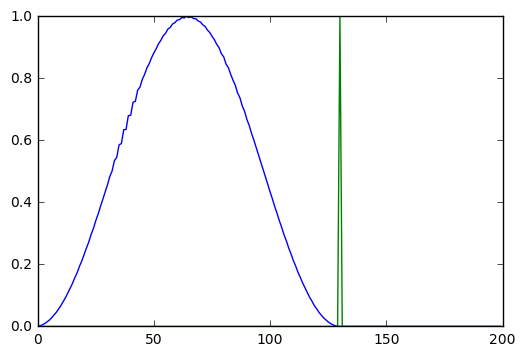

iteration=97000, cost=11.508471


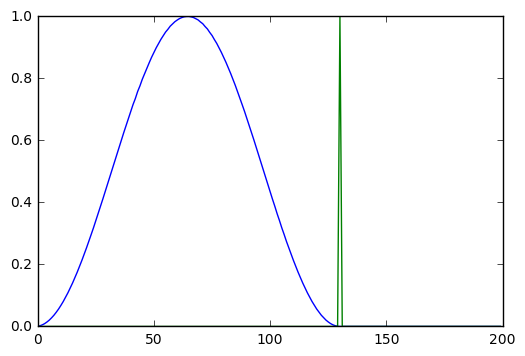

iteration=98000, cost=11.506252


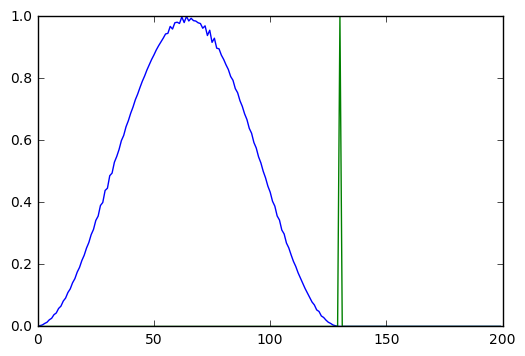

iteration=99000, cost=11.503667


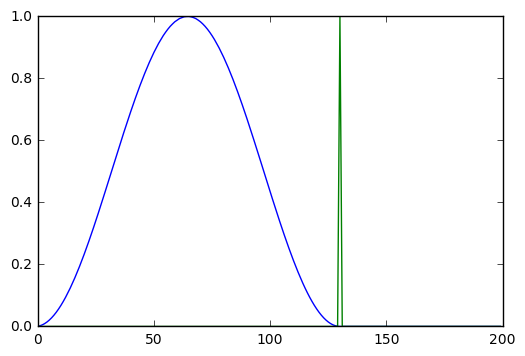

In [15]:
'''이터레이션의 절반이 지나가면 포텐셜이 갑자기 변하게 설정했다.
만약 이러한 변화를 연속적으로 할 수 있다면 시간에 따른 변화처럼 생각할 수도 있을것 같다.'''
resultsum = 0
for i in range (iteration):
    
        # Potential change
    if i<int(iteration/2):
        potential_change = Lpotential
    else:
        potential_change = Rpotential
    potential_change_value = sess.run(potential_change)
    psi_now, potential_now = sess.run([psi,potential], feed_dict={potential:potential_change_value})
    prob_now = psi_now**2
    cost_now = sess.run(cost, feed_dict={potential:potential_change_value})
    sess.run(train, feed_dict={potential:potential_change_value})
#     print(psi_now)
    if i % 1000 == 0:
        print("iteration=%d, cost=%f" % (i, cost_now))
        plt.plot(prob_now[0]/max(prob_now[0]))
        plt.plot(potential_now[0]/max(potential_now[0]))
        plt.show()

## 